In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0


In [6]:
# Define the model
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [8]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4977 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3758 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2955 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2779 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2566 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2480 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.239

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8838
Test accuracy: 0.8838000297546387


In [10]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [11]:
# Show some example images and their predicted labels
num_rows = 5
num_cols = 5

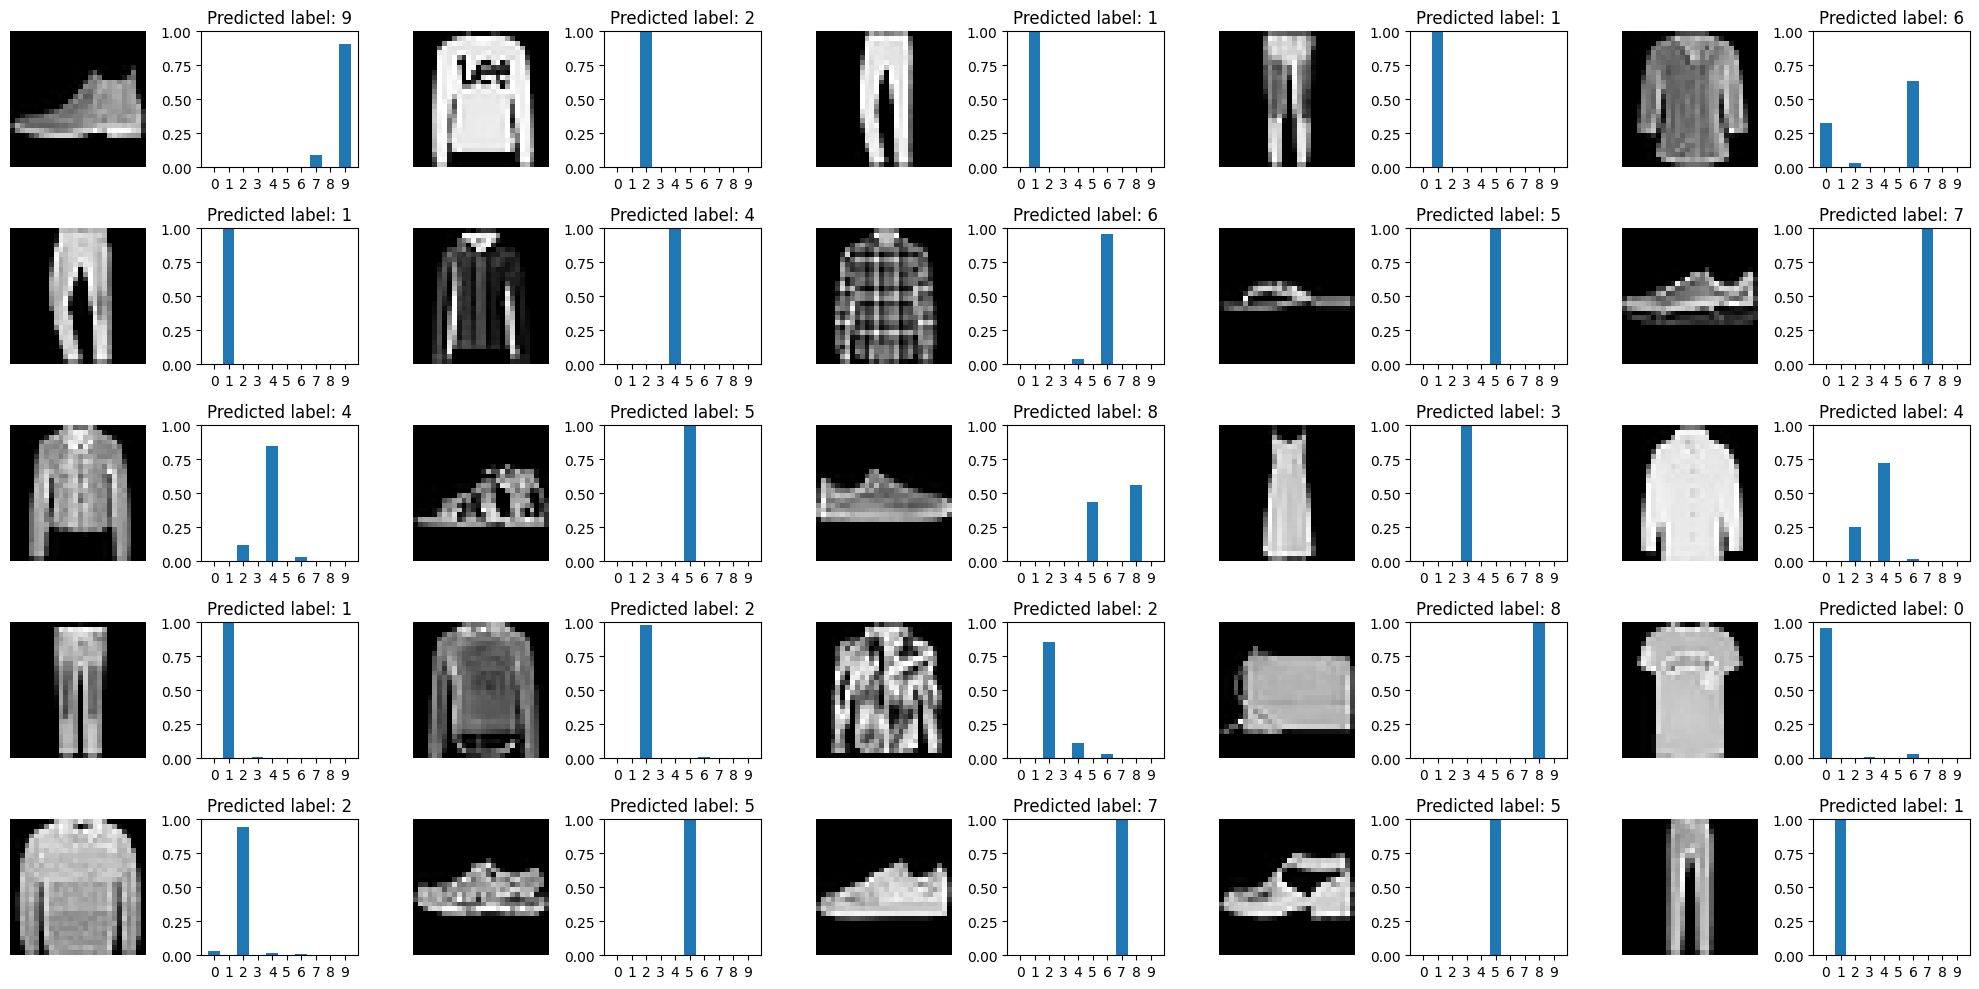

In [16]:
num_images = num_rows * num_cols 
plt.figure(figsize=(2 *2 * num_cols, 2 * num_rows)) 
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plt.imshow(test_images[i], cmap='gray') 
  plt.axis('off')
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plt.bar(range(10), predictions[i]) 
  plt.xticks(range(10))
  plt.ylim([0, 1])
  plt.tight_layout()
  plt.title(f"Predicted label: {predicted_labels[i]}")
plt.show()
